# ETL and EDA of data checkin

## Intro

The purpose of this notebook is to just explore a chunk of data. 

Data: 
- checkin.json


## Index 
1. [Data upload](#data-upload)
2. [Data description](#data-description)
3. [Data transformation](#data-transformation)
4. [EDA](#eda)



## Checkin

In [3]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

### 1. Data upload

In [4]:
df_checkin = pd.read_json('../../../Datasets/Yelp/checkin.json', lines=True)

### 2. Data description

In [4]:
cantidad_de_registros = len(df_checkin)
print("Files: ", cantidad_de_registros)

Files:  131930


In [5]:
columnas = df_checkin.columns
print("Columns: ",columnas)

Columns:  Index(['business_id', 'date'], dtype='object')


In [6]:
print("column info")
df_checkin.info()

column info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [7]:
tabla = tabulate(df_checkin.head(10), headers='keys', tablefmt='pretty', showindex=False)
print(tabla)

+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
print(df_checkin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB
None


The date log data that you are seeing in the "date" column of your data set may be check-in records, that is, records of the date and time that check-in events occurred at the various businesses.

In [9]:
# see how many nulls there are
df_checkin.isnull().sum()

business_id    0
date           0
dtype: int64

### 3. Data transformation

Data is broken down into business_id, dates and hour

In [5]:
df_checkin['date'] = df_checkin['date'].str.split(', ')


In [7]:
df_checkin = df_checkin.explode('date')


In [8]:
df_checkin[['date', 'hora']] = df_checkin['date'].str.split(' ', expand=True)


In [9]:
checkin = df_checkin[['business_id', 'date', 'hora']]


Data year month and day

In [10]:
checkin['date'] = pd.to_datetime(checkin['date'])


In [11]:
checkin['year'] = checkin['date'].dt.year


In [12]:
checkin['month'] = checkin['date'].dt.month


In [13]:
# Diccionario de mapeo de números de mes a nombres en inglés
meses_en_ingles = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Aplicar la conversión a la columna 'mes' en tu DataFrame
checkin['month_letter'] = checkin['month'].map(meses_en_ingles)

In [14]:
checkin['weekday'] = checkin['date'].dt.strftime('%A')


In [15]:
checkin.head()

,business_id,date,hora,year,month,month_letter,weekday
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13,21:10:56,2020,3,March,Friday
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02,22:18:06,2020,6,June,Tuesday
0,---kPU91CF4Lq2-WlRu9Lw,2020-07-24,22:42:27,2020,7,July,Friday
0,---kPU91CF4Lq2-WlRu9Lw,2020-10-24,21:36:13,2020,10,October,Saturday
0,---kPU91CF4Lq2-WlRu9Lw,2020-12-09,21:23:33,2020,12,December,Wednesday


## 4. EDA 

Descriptive statistics

In [18]:
checkin.describe()

,year,month
count,1.335688e+07,1.335688e+07
mean,2.015299e+03,6.490566e+00
std,2.762010e+00,3.399286e+00
min,2.009000e+03,1.000000e+00
25%,2.013000e+03,4.000000e+00
50%,2.015000e+03,6.000000e+00
75%,2.017000e+03,9.000000e+00
max,2.022000e+03,1.200000e+01


Data visualization

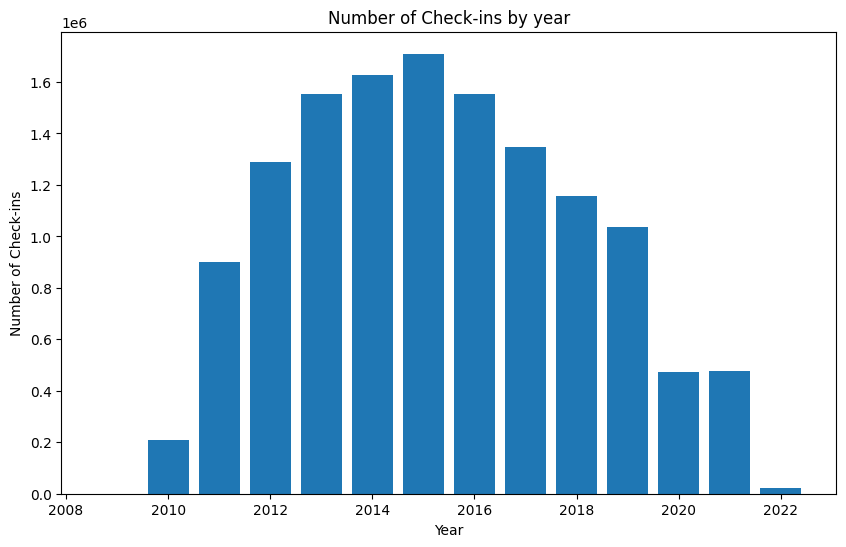

In [21]:
checkins_por_anio = checkin['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))  # size
plt.bar(checkins_por_anio.index, checkins_por_anio.values)
plt.xlabel('Year')
plt.ylabel('Number of Check-ins')
plt.title('Number of Check-ins by year')

plt.show()


It can be seen that the year with the highest number of check-ins is 2015 and the year with the least check-ins is 2022.

In [22]:
meses_con_checkins = checkin['month_letter'].value_counts().reset_index()
meses_con_checkins.columns = ['month', 'size of check-ins']

meses_con_checkins = meses_con_checkins.sort_values(by='size of check-ins', ascending=False)

mes_con_mas_checkins = meses_con_checkins.iloc[0]['month']
cantidad_checkins_max = meses_con_checkins.iloc[0]['size of check-ins']

print(f"The month with the most check-ins is {mes_con_mas_checkins} with a total of {cantidad_checkins_max} check-ins.")


The month with the most check-ins is July with a total of 1186381 check-ins.


In [23]:
print(meses_con_checkins) 

        month  size of check-ins
0        July            1186381
1       March            1177078
2         May            1173983
3      August            1171773
4        June            1125308
5       April            1112204
6     October            1109561
7   September            1085081
8    December            1081859
9     January            1055898
10   November            1039774
11   February            1037975


In [24]:
dias_con_checkins = checkin['weekday'].value_counts().reset_index()
dias_con_checkins.columns = ['day', 'size of check-ins']

# Sort days by number of check-ins in descending order
dias_con_checkins = dias_con_checkins.sort_values(by='size of check-ins', ascending=False)

# Get the day of the week with the most check-ins
dia_con_mas_checkins = dias_con_checkins.iloc[0]['day']
cantidad_checkins_max = dias_con_checkins.iloc[0]['size of check-ins']

print(f"The day with the most check-ins is {dia_con_mas_checkins} with a total of {cantidad_checkins_max} check-ins.")


The day with the most check-ins is Saturday with a total of 2810469 check-ins.


In [25]:
print(dias_con_checkins)

         day  size of check-ins
0   Saturday            2810469
1     Sunday            2480701
2     Friday            1959015
3   Thursday            1612496
4  Wednesday            1541769
5     Monday            1491993
6    Tuesday            1460432


In [29]:

checkins_por_business = checkin['business_id'].value_counts().reset_index()
checkins_por_business.columns = ['business', 'size of check-ins']

checkins_por_business = checkins_por_business.sort_values(by='size of check-ins', ascending=False)

business_id_con_mas_checkins = checkins_por_business.iloc[0]['business']
cantidad_checkins_max = checkins_por_business.iloc[0]['size of check-ins']

print(f"The businness with the most check-ins is {business_id_con_mas_checkins} with a total of {cantidad_checkins_max} check-ins.")


The businness with the most check-ins is -QI8Qi8XWH3D8y8ethnajA with a total of 52144 check-ins.


Ouliers

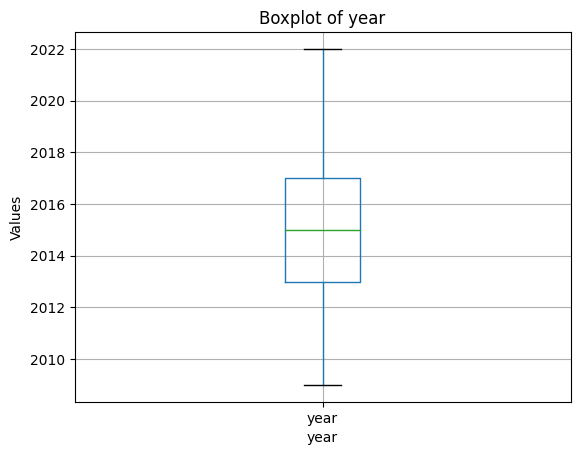

In [28]:
columnas = ['year'] 			

checkin[columnas].boxplot()

plt.xlabel('year')
plt.ylabel('Values')
plt.title('Boxplot of year')

plt.show()

Export the checkin data to checkin.csv

In [16]:
checkin.to_csv('../../../Datasets/Yelp/checkin.csv', index=False)

Export the checkin 2018-2023 data to checkin_2018_2022.csv

In [ ]:
checkin_filtrado = checkin[(checkin['year'] >= 2018) & (checkin['year'] <= 2022)]


In [ ]:
checkin_filtrado.to_csv('../../../Datasets/Yelp/checkin_2018_2022.csv', index=False)